Задание № 1 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

In [1]:
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = mannwhitneyu(A,B) #берем U-тест Манна-Уитни, так как выборки независимые
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4343.000, p=0.054
Одинаковые распределения (не отвергаем H0)


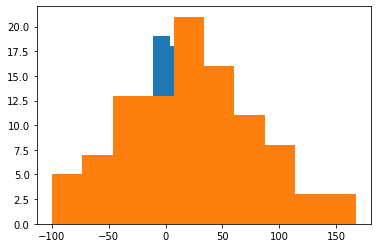

In [ ]:
import matplotlib.pyplot as plt 
plt.hist(A)
plt.hist(B);

Задание № 2 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
А - группа людей без препарата.

B - та же группа людей, но получающая препарат

In [9]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
np.random.seed(11)
A1 = stats.norm.rvs(scale=30, loc=11, size=100)
B1 = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = wilcoxon(A, B) #берем тест Уилкоксона , так как выборки зависимые (одна и та же группа людей , но в разное время)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


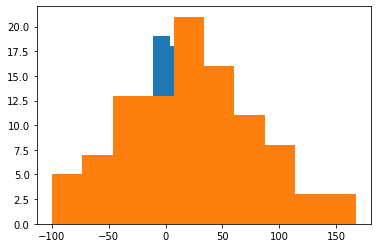

In [10]:
import matplotlib.pyplot as plt 
plt.hist(A1)
plt.hist(B1);

Задание № 3 (Обязательно) Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [85]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway 
F, p = f_oneway(water,nutri,mineral)  # дисперсионный анализ (ДА) в python, F - дисперсия между группами / дисперсия внутри группы

alpha = 0.05  # Уровень значимости
print(F, p)  

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


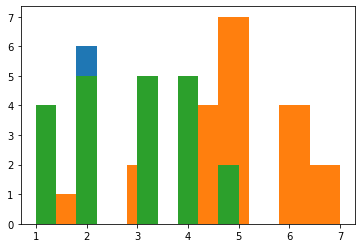

In [ ]:
plt.hist(water)
plt.hist(nutri)
plt.hist(mineral);

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.


Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:
pid: Numeric - ID покемона

*   pid: Numeric - ID покемона
*   HP: Numeric - Очки здоровья
*   Attack: Numeric - Сила обычной атаки
*   Defense: Numeric - Сила обычной защиты
*   Sp. Atk: Numeric - Сила специальной атаки
*   Sp. Def: Numeric - Сила специальной защиты
*   Speed: Numeric - Скорость движений
*   Legendary: Boolean - «True», если покемон редкий
*   Class 1: Categorical - Класс покемона
*   Class 2: Categorical - Класс покемона

In [3]:
import pandas as pd
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head(10)

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


Задание № 1 (Обязательно):
Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pokemon=pokemon.drop(pokemon[(pokemon['Class 1']=='Rock')&(pokemon['Class 2']=='Grass')].index)# удаляем покемонов относящихся к обоим классам
pokemon=pokemon.drop(pokemon[(pokemon['Class 1']=='Grass')&(pokemon['Class 2']=='Rock')].index)

In [ ]:
p_grass=pokemon.loc[(pokemon['Class 1']=='Grass')|(pokemon['Class 2']=='Grass')]  # группа покемонов с классом Grass

In [ ]:
p_rock=pokemon.loc[(pokemon['Class 1']=='Rock')|(pokemon['Class 2']=='Rock')] # группа покемонов с классом Rock

In [ ]:
t, p_value = stats.ttest_ind(p_grass['Attack'], p_rock['Attack']) # применим Критерий Стьюдента (t-test), так как у нас распределение нормальное
t, p_value  

(-3.729457582692065, 0.00027333381459902653)

In [ ]:
# можно сделать вывод что есть статистически значимые отличия , так как p-value меньше 5%

(array([ 1.,  1., 10.,  5.,  8., 10.,  7.,  6.,  5.,  3.]),
 array([ 10. ,  25.5,  41. ,  56.5,  72. ,  87.5, 103. , 118.5, 134. ,
        149.5, 165. ]),
 <a list of 10 Patch objects>)

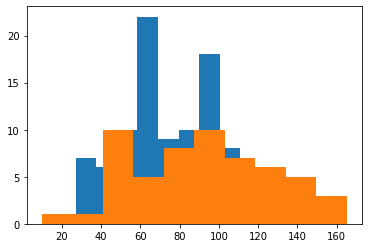

In [ ]:
import matplotlib.pyplot as plt  
plt.hist(p_grass['Attack'])
plt.hist(p_rock['Attack'])

In [ ]:
# можно сделать вывод из визуализации, что покемоны из класса Grass показывают более высокие значения атаки

Задание № 2 (Обязательно):
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [ ]:
pokemon=pokemon.drop(pokemon[(pokemon['Class 1']=='Water')&(pokemon['Class 2']=='Normal')].index)# удаляем покемонов относящихся к обоим классам
pokemon=pokemon.drop(pokemon[(pokemon['Class 1']=='Normal')&(pokemon['Class 2']=='Water')].index)

In [ ]:
p_water=pokemon.loc[(pokemon['Class 1']=='Water')|(pokemon['Class 2']=='Water')]  # группа покемонов с классом Water
p_normal=pokemon.loc[(pokemon['Class 1']=='Normal')|(pokemon['Class 2']=='Normal')] # группа покемонов с классом Normal

In [ ]:
t, p_value = stats.ttest_ind(p_water['Speed'], p_normal['Speed']) # применим Критерий Стьюдента (t-test), так как у нас распределение нормальное
t, p_value  

(-2.150913330007121, 0.03255353551391033)

In [ ]:
# можно сделать вывод что есть статистически значимые отличия , так как p-value меньше 5%

(array([ 2.,  8.,  6., 17., 11., 17., 16., 13.,  8.,  3.]),
 array([  5.,  18.,  31.,  44.,  57.,  70.,  83.,  96., 109., 122., 135.]),
 <a list of 10 Patch objects>)

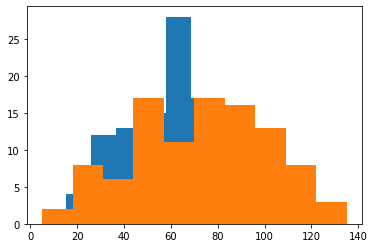

In [ ]:
plt.hist(p_water['Speed'])
plt.hist(p_normal['Speed'])

In [ ]:
# и по визуализации видно что покемоны в классе Water более быстрые

Задание № 3:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [4]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [5]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
# сделаем фильтр на покемонов принимавших сыворотку

In [6]:
treathed_pokemon=pokemon.loc[(pokemon['Name']=='Mega Beedrill')|(pokemon['Name']=='Mega Alakazam')|(pokemon['Name']=='Deoxys Normal Forme')|(pokemon['Name']=='Mega Lopunny')] 
treathed_pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [7]:
t, p_value = stats.ttest_ind(pokemon['Speed'], treathed_pokemon['Speed'])
t, p_value

(-5.2763372799195425, 1.697269585494424e-07)

In [ ]:
# по p-value можно сказать что есть существенные статистически значимые отличия , но не понятно чьи значения больше

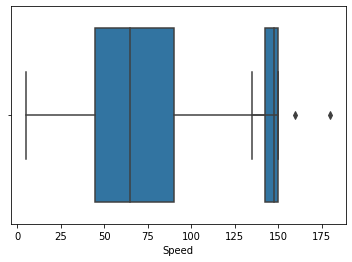

In [65]:
import seaborn as sns
sns.boxplot(x=pokemon['Speed'])
sns.boxplot(x=treathed_pokemon['Speed'])

In [ ]:
# по ящикам с усами  можно сделать вывод что покемоны принимающие сыворотку быстрее всех остальных в общем. Их скорости гораздо в среднем гораздо выше

Задание № 4:
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [18]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [29]:
p_leg=pokemon.loc[pokemon['Legendary']==True] # группа покемонов легендарных
p_neleg=pokemon.loc[pokemon['Legendary']==False] # группа покемонов обычных
p_neleg.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [48]:
p_leg['summ']=p_leg['HP']+p_leg['Attack']+p_leg['Defense']
p_leg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summ
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300


In [49]:
p_neleg['summ']=p_neleg['HP']+p_neleg['Attack']+p_neleg['Defense']
p_neleg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summ
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134
...,...,...,...,...,...,...,...,...,...,...,...,...
787,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,False,307
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False,209
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False,396
790,791,Noibat,Flying,Dragon,40,30,35,45,40,55,False,105


In [51]:
t, p_value = stats.ttest_ind(p_leg['summ'], p_neleg['summ'])
t, p_value

(11.591852366462316, 7.970942205722087e-29)

In [ ]:
# p-value меньше 5% поэтому различия есть и они статистически значимы

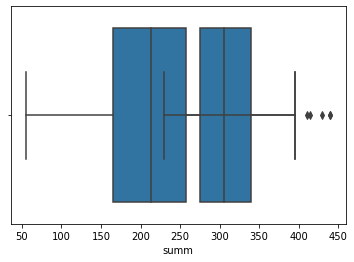

In [79]:
sns.boxplot(x=p_leg['summ']);
sns.boxplot(x=p_neleg['summ'])







In [ ]:
# сумма характеристик действительно выше у легендарных покемонов , по ящику с усами видно что среднее выше у легендарных

Задание № 6:
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

In [82]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
p_rock=pokemon.loc[(pokemon['Class 1']=='Rock')|(pokemon['Class 2']=='Rock')] # покемоны класса Rock
p_ground=pokemon.loc[(pokemon['Class 1']=='Ground')|(pokemon['Class 2']=='Ground')] # покемоны класса Ground
p_steel=pokemon.loc[(pokemon['Class 1']=='Steel')|(pokemon['Class 2']=='Steel')] ## покемоны класса Steel
p_ice=pokemon.loc[(pokemon['Class 1']=='Ice')|(pokemon['Class 2']=='Ice')] # покемоны класса Ice

In [91]:
F, p = f_oneway(p_rock['Defense'], p_ground['Defense'],p_steel['Defense'],p_ice['Defense']) #используем дисперсионный анализ, так как значений больше двух
F,p

(10.82012408304731, 1.231528168152447e-06)

In [ ]:
#исходя из того что p-value меньше 5%, можно сделать вывод что различия статистически значимы у этих классов